<a href="https://colab.research.google.com/github/dmassoo/MLT_labs/blob/main/Dmitrii_Vorotnikov_J41321c__MLT_2022_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GD

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# func to minimize, its partial derivatives and gradient definition
def f(x, y) -> float:
    return x**2 + (y-1)**2

def dfdx(x,y):
    return 2 * x

def dfdy(x,y):
    return 2 * (y - 1)

def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

In [74]:
def grad_descent_mult(df, x_prev, learn_rate=1e-3, tol=1e-3):
    # iteration number
    grad_itter = 1
    # lists to save values of weigths vectors
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # gradient descent procedure in the loop
    while np.linalg.norm(np.subtract(x_next,x_prev)) > tol:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

In [75]:
# data for plots preparation
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

Minimum (x,y) from gradient descent: [0.0010156  1.00016927]
Number of gradient descent iterations: 17


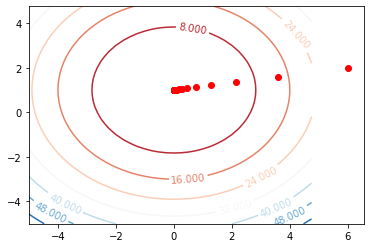

In [76]:
from matplotlib import cm

# contour plot
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

# call GD func
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

# draws coutour plot
contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

In [77]:
# Adam GD modification
def adam(df,x_prev, learn_rate=1e-3, tol=1e-6):
    def step_vs(t, v_prev, s_prev, x_prev):
        grad = grad_vector(x_prev[0], x_prev[1])
        vt = b1 * v_prev + (1 - b1) * grad
        st = b2 * s_prev + (1 - b2) * (grad ** 2)
        st_corr = st / (b2 ** t)
        return (learn_rate * vt / (st_corr ** 0.5), vt, st)
    # adam optimal params
    b1 = 0.9
    b2 = 0.999
    e = 10e-8
    # iteration number
    grad_itter = 1
    # 
    # lists to save values of weigths vectors
    seq_x = []
    seq_y = []
    step, vt, st = step_vs(grad_itter, 0, 0, x_prev)
    x_next = np.subtract(x_prev, step)
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # gradient descent procedure in the loop
    while np.linalg.norm(np.subtract(x_next,x_prev)) > tol:
        step, vt, st = step_vs(grad_itter, vt, st, x_prev)
        x_prev = x_next
        x_next = x_prev - learn_rate*step
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

Minimum (x,y) from adam: [8.51349194e-08 9.99916845e-01]
Number of adam iterations: 346


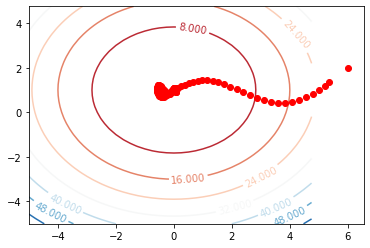

In [78]:
# call ADAM func
adam_output = adam(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from adam: %s' %adam_output[0])
print('Number of adam iterations: %s' %adam_output[1])

# draws coutour plot
contour_plot(adam_output[2],adam_output[3], np.array([6,2]))

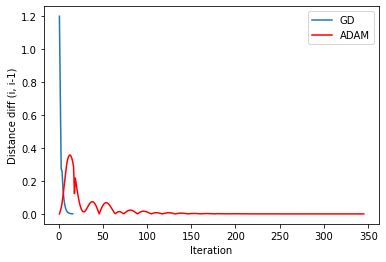

In [79]:
# difference in distances between i-th and (i-1)-th iterations versus i
def dist_n(xs, ys):
    n = range(len(xs-1))
    dist = []
    diff = []
    for i in n:
        dist.append(np.abs(xs[i] - ys[i]))
        if (i > 0):
            diff.append(np.abs(dist[i]-dist[i-1]))
    _n = list(n)
    _n.remove(0)
    return diff, _n


plt.figure(figsize=(6,4))
dist, n = dist_n(grad_output[2],grad_output[3])
plt.plot(n, dist, label = "GD")
dist, n = dist_n(adam_output[2],adam_output[3])
plt.plot(n, dist, color='r', label = "ADAM")
plt.ylabel("Distance diff (i, i-1)")
plt.xlabel("Iteration")
plt.legend()

### Adam

Adam  (Adaptive momentum algorithm) combines momentum and RMSprop approaches:

- computes adaptive learning rates;
- storing an exponentially moving average of past squared gradients

and uses scaling of the gradients:

$${V_t^{corr}}= \frac{V_t}{1 - \beta^t}$$

Parameters:
- learning rate $\eta$
- $\beta_1$
- $\beta_2$
- $\epsilon$

The moving averages of past and past squared gradients $V_t$ and $S_t$ respectively are computed as follows:

$$V_t = \beta_1 V_{t-1} + (1 - \beta_1)g_t$$
$$S_t = \beta_2 S_{t-1} + (1 - \beta_2)g^2_t$$

Adam update rule for the model weights:

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{{S_t^{corr}}} + \epsilon}{V_t}$$

Suggested values for $\beta_1$ is 0.9, for $\beta_2$ is 0.999 and $10^{-8}$ for $\epsilon$.